In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
len(train_labels)

60000

In [17]:
test_images.shape

(10000, 28, 28)

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

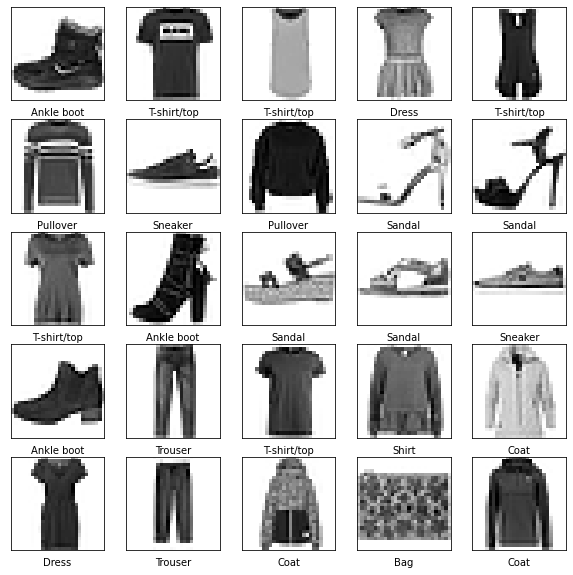

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4991 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3779 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3409 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3297 - accuracy: 0.8854 - 1s/epoch - 3ms/step

Test accuracy: 0.8853999972343445


In [24]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.2601083e-06, 1.2361923e-07, 3.8623273e-08, 1.9131480e-07,
       9.1571026e-09, 3.6097152e-04, 3.4229781e-06, 1.5728308e-02,
       9.8883834e-07, 9.8390466e-01], dtype=float32)

In [25]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel('{} : {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

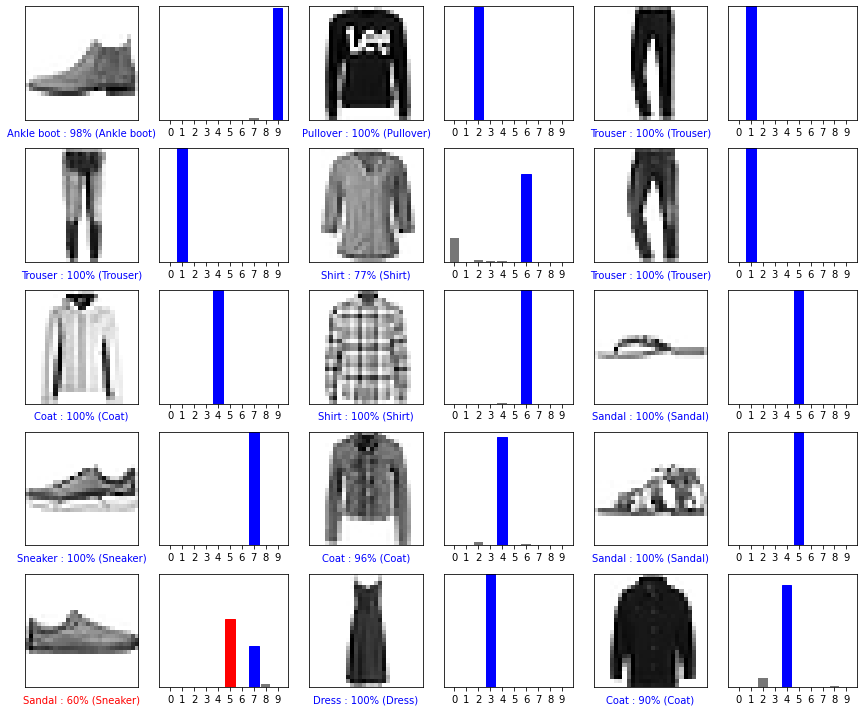

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()